In [ ]:
pip install seaborn

In [3]:
import pandas as pd
import numpy as np

# 引入今天的新朋友：可视化库
import matplotlib.pyplot as plt
import seaborn as sns

# --- 为了接续上一期的内容 ---
# 我们在这里“伪造”一下上一期清洗好的 df_cleaned
# （在真实项目中，你会直接保存和读取 df_cleaned，我们稍后会讲）
data = {
    'Voltage': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.4, 0.3, 0.2, 0.1,
                0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.4, 0.3, 0.2, 0.1],
    'Current': [0.001, 0.003, 0.005, 0.007, 0.000, 0.006, 0.004, 0.002, 0.000, -0.001,
                0.001, 0.003, 0.005, 0.007, 0.008, 0.006, 0.004, 0.002, 0.000, -0.001],
    'Cycle': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
              2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
}
df_cleaned = pd.DataFrame(data)

print("数据准备就绪：")
print(df_cleaned.head())

数据准备就绪：
   Voltage  Current  Cycle
0      0.0    0.001      1
1      0.1    0.003      1
2      0.2    0.005      1
3      0.3    0.007      1
4      0.4    0.000      1


In [4]:
# 直接对两列进行数学运算
df_cleaned['Resistance'] = df_cleaned['Voltage'] / df_cleaned['Current']

print(df_cleaned.head())

   Voltage  Current  Cycle  Resistance
0      0.0    0.001      1    0.000000
1      0.1    0.003      1   33.333333
2      0.2    0.005      1   40.000000
3      0.3    0.007      1   42.857143
4      0.4    0.000      1         inf


In [5]:
# 使用 np.where(条件, 条件为True时的值, 条件为False时的值)
# 避免除零错误：当电流接近0时（比如小于1e-9），我们强行让电阻为 NaN
df_cleaned['Resistance'] = np.where(
    np.abs(df_cleaned['Current']) < 1e-9,  # 条件
    np.nan,                                # True: 设为 NaN
    df_cleaned['Voltage'] / df_cleaned['Current'] # False: 正常计算
)

print(df_cleaned.head(10)) # 打印前10行，看看Cycle 1的结果

   Voltage  Current  Cycle  Resistance
0      0.0    0.001      1    0.000000
1      0.1    0.003      1   33.333333
2      0.2    0.005      1   40.000000
3      0.3    0.007      1   42.857143
4      0.4    0.000      1         NaN
5      0.5    0.006      1   83.333333
6      0.4    0.004      1  100.000000
7      0.3    0.002      1  150.000000
8      0.2    0.000      1         NaN
9      0.1   -0.001      1 -100.000000


In [6]:
# 核心操作：按 'Cycle' 分组，然后只看 'Current' 列，最后计算平均值
cycle_avg_current = df_cleaned.groupby('Cycle')['Current'].mean()

print(cycle_avg_current)

Cycle
1    0.0027
2    0.0035
Name: Current, dtype: float64


In [7]:
# 1. 按 'Cycle' 分组
grouped_by_cycle = df_cleaned.groupby('Cycle')

# 2. 对 'Current' 列应用一系列聚合函数
stats = grouped_by_cycle['Current'].agg(['mean', 'std', 'max', 'min'])

print(stats)

         mean       std    max    min
Cycle                                
1      0.0027  0.002751  0.007 -0.001
2      0.0035  0.003028  0.008 -0.001


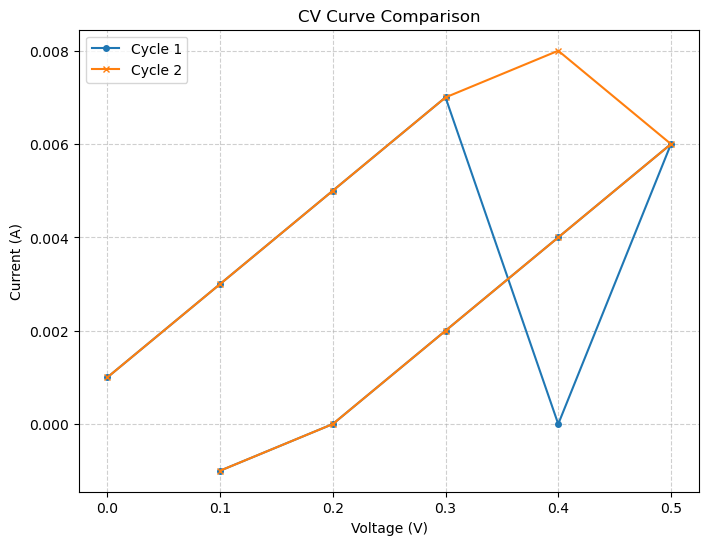

In [8]:
# 1. 筛选出两组数据 (我们在上节课学过的)
cycle_1 = df_cleaned[df_cleaned['Cycle'] == 1]
cycle_2 = df_cleaned[df_cleaned['Cycle'] == 2]

# 2. 开始画图
plt.figure(figsize=(8, 6)) # 设置画布大小

# 画第一条线
plt.plot(cycle_1['Voltage'], cycle_1['Current'], 
         label='Cycle 1', marker='o', markersize=4)

# 画第二条线
plt.plot(cycle_2['Voltage'], cycle_2['Current'], 
         label='Cycle 2', marker='x', markersize=4)

# 3. 添加“装修”
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.title('CV Curve Comparison')
plt.legend() # 显示图例
plt.grid(True, linestyle='--', alpha=0.6) # 添加网格线

plt.show() # 显示图像

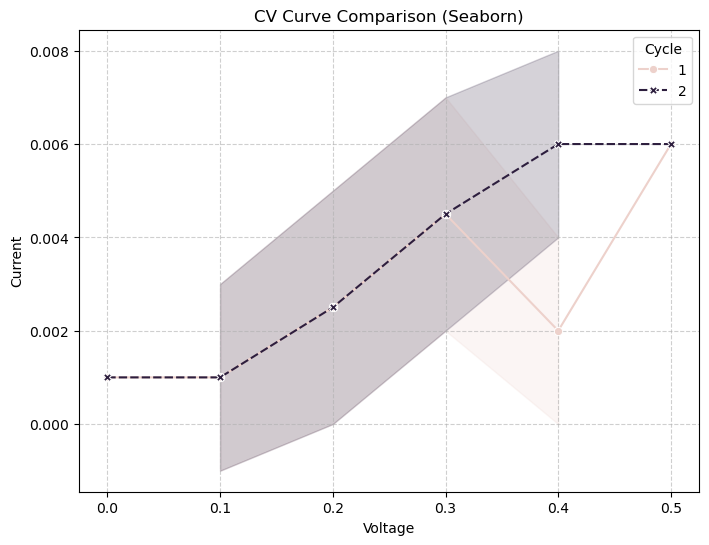

In [9]:
# 同样先设置一下画布
plt.figure(figsize=(8, 6))

# 核心：一行代码搞定！
sns.lineplot(
    data=df_cleaned,  # 告诉Seaborn用哪个DataFrame
    x='Voltage',      # x轴用 'Voltage' 列
    y='Current',      # y轴用 'Current' 列
    hue='Cycle',      # 关键！告诉Seaborn按 'Cycle' 列来“自动分组”和“涂色”
    style='Cycle',    # 让 'Cycle' 列也控制线条样式（比如虚线/实线）
    markers=True      # 添加标记
)

# “装修” (Seaborn的装修风格通常更好看，但我们也可以用plt来微调)
plt.title('CV Curve Comparison (Seaborn)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [10]:
# 1. 保存为 CSV (最常用)
# index=False 的意思是：不要把Pandas的行索引(0, 1, 2...)也存进去
df_cleaned.to_csv('my_cv_data_CLEANED.csv', index=False)

# 2. 保存为 Excel (如果你需要给导师/同事看)
# 你可能需要安装 openpyxl 库: pip install openpyxl
# df_cleaned.to_excel('my_cv_data_CLEANED.xlsx', index=False, sheet_name='CV_Data')